---
# <center><font style="color: purple;">Credit Card Fraud Detection</font></center>    
---
* <font color="purple">Author : ***H. Moustapha Ousmane***<br>

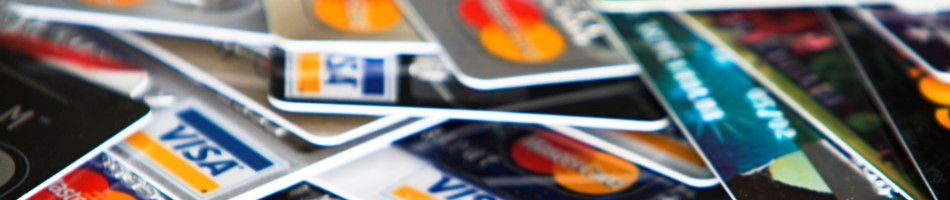

## <center><font color="purple">Synopsis</font></center>
This project is about building a machine learning model to identify fraudulent credit card transactions. To do so, we will preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets. Then we will train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine. Finaly, we will evaluate the models' performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.

The dataset used in this project is the `Credit Card Fraud Detection` dataset from Kaggle. Click [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) to see the dataset.

## <center><font color="purple"> Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## <center><font color="purple">2. Exploratory Analysis

### <center><font color="purple">2.1 Load the Dataset

In [2]:
data = pd.read_csv ('creditcard.csv')
data.head ()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### <center><font color="purple">2.2. Descriptive Statistics

In [3]:
print (f"The shape of the dataset : {data.shape}")
print (f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")
print ("=======================================\n")

print (f"Data (variables) types :\n{data.dtypes}")
print ("=======================================\n")

print (f"The number of missing values (na) is each column :\n{data.isna ().sum()}")
print ("=======================================\n")

print ("Descriptive statistics :\n")
data.describe ()

The shape of the dataset : (284807, 31)
The dataset has 284807 rows and 31 columns.

Data (variables) types :
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

The number of missing values (na) is each column :
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### <center><font color="purple">2.3 Data Processing

In [4]:
print (f"Missing values (NaN) in dataset :\n ")
# Retrive the names of variable that presents NaN values
nan_columns = [column for column in data.columns if data [column].isna ().sum () > 0]
print (f"There is not any Nan value in the dataset as the lenght of nan_columns = {len (nan_columns)}")
print ("\========================================\n")

Missing values (NaN) in dataset :
 
There is not any Nan value in the dataset as the lenght of nan_columns = 0
\========================================



As ther is no NaN values and all the features are numerical all that is left to process the data is to handle duplicate values.
* ***<font color="purple">Handling Duplicates</font>***

In [5]:
print ("Dataset shape before handling duplicates :", data.shape)
# Count the duplicate values
print (f"The number of duplicates is {data.duplicated ().sum ()}")

Dataset shape before handling duplicates : (284807, 31)


The number of duplicates is 1081


In [6]:
# Drop the duplicate values
data = data.drop_duplicates ()
print ("Dataset shape after handling duplicates :", data.shape)
# Check is there is any duplicate
print (f"The number of duplicates is {data.duplicated ().sum ()}")

Dataset shape after handling duplicates : (283726, 31)
The number of duplicates is 0


* ***<font color="purple">Correlation Matrix</font>***

<Axes: >

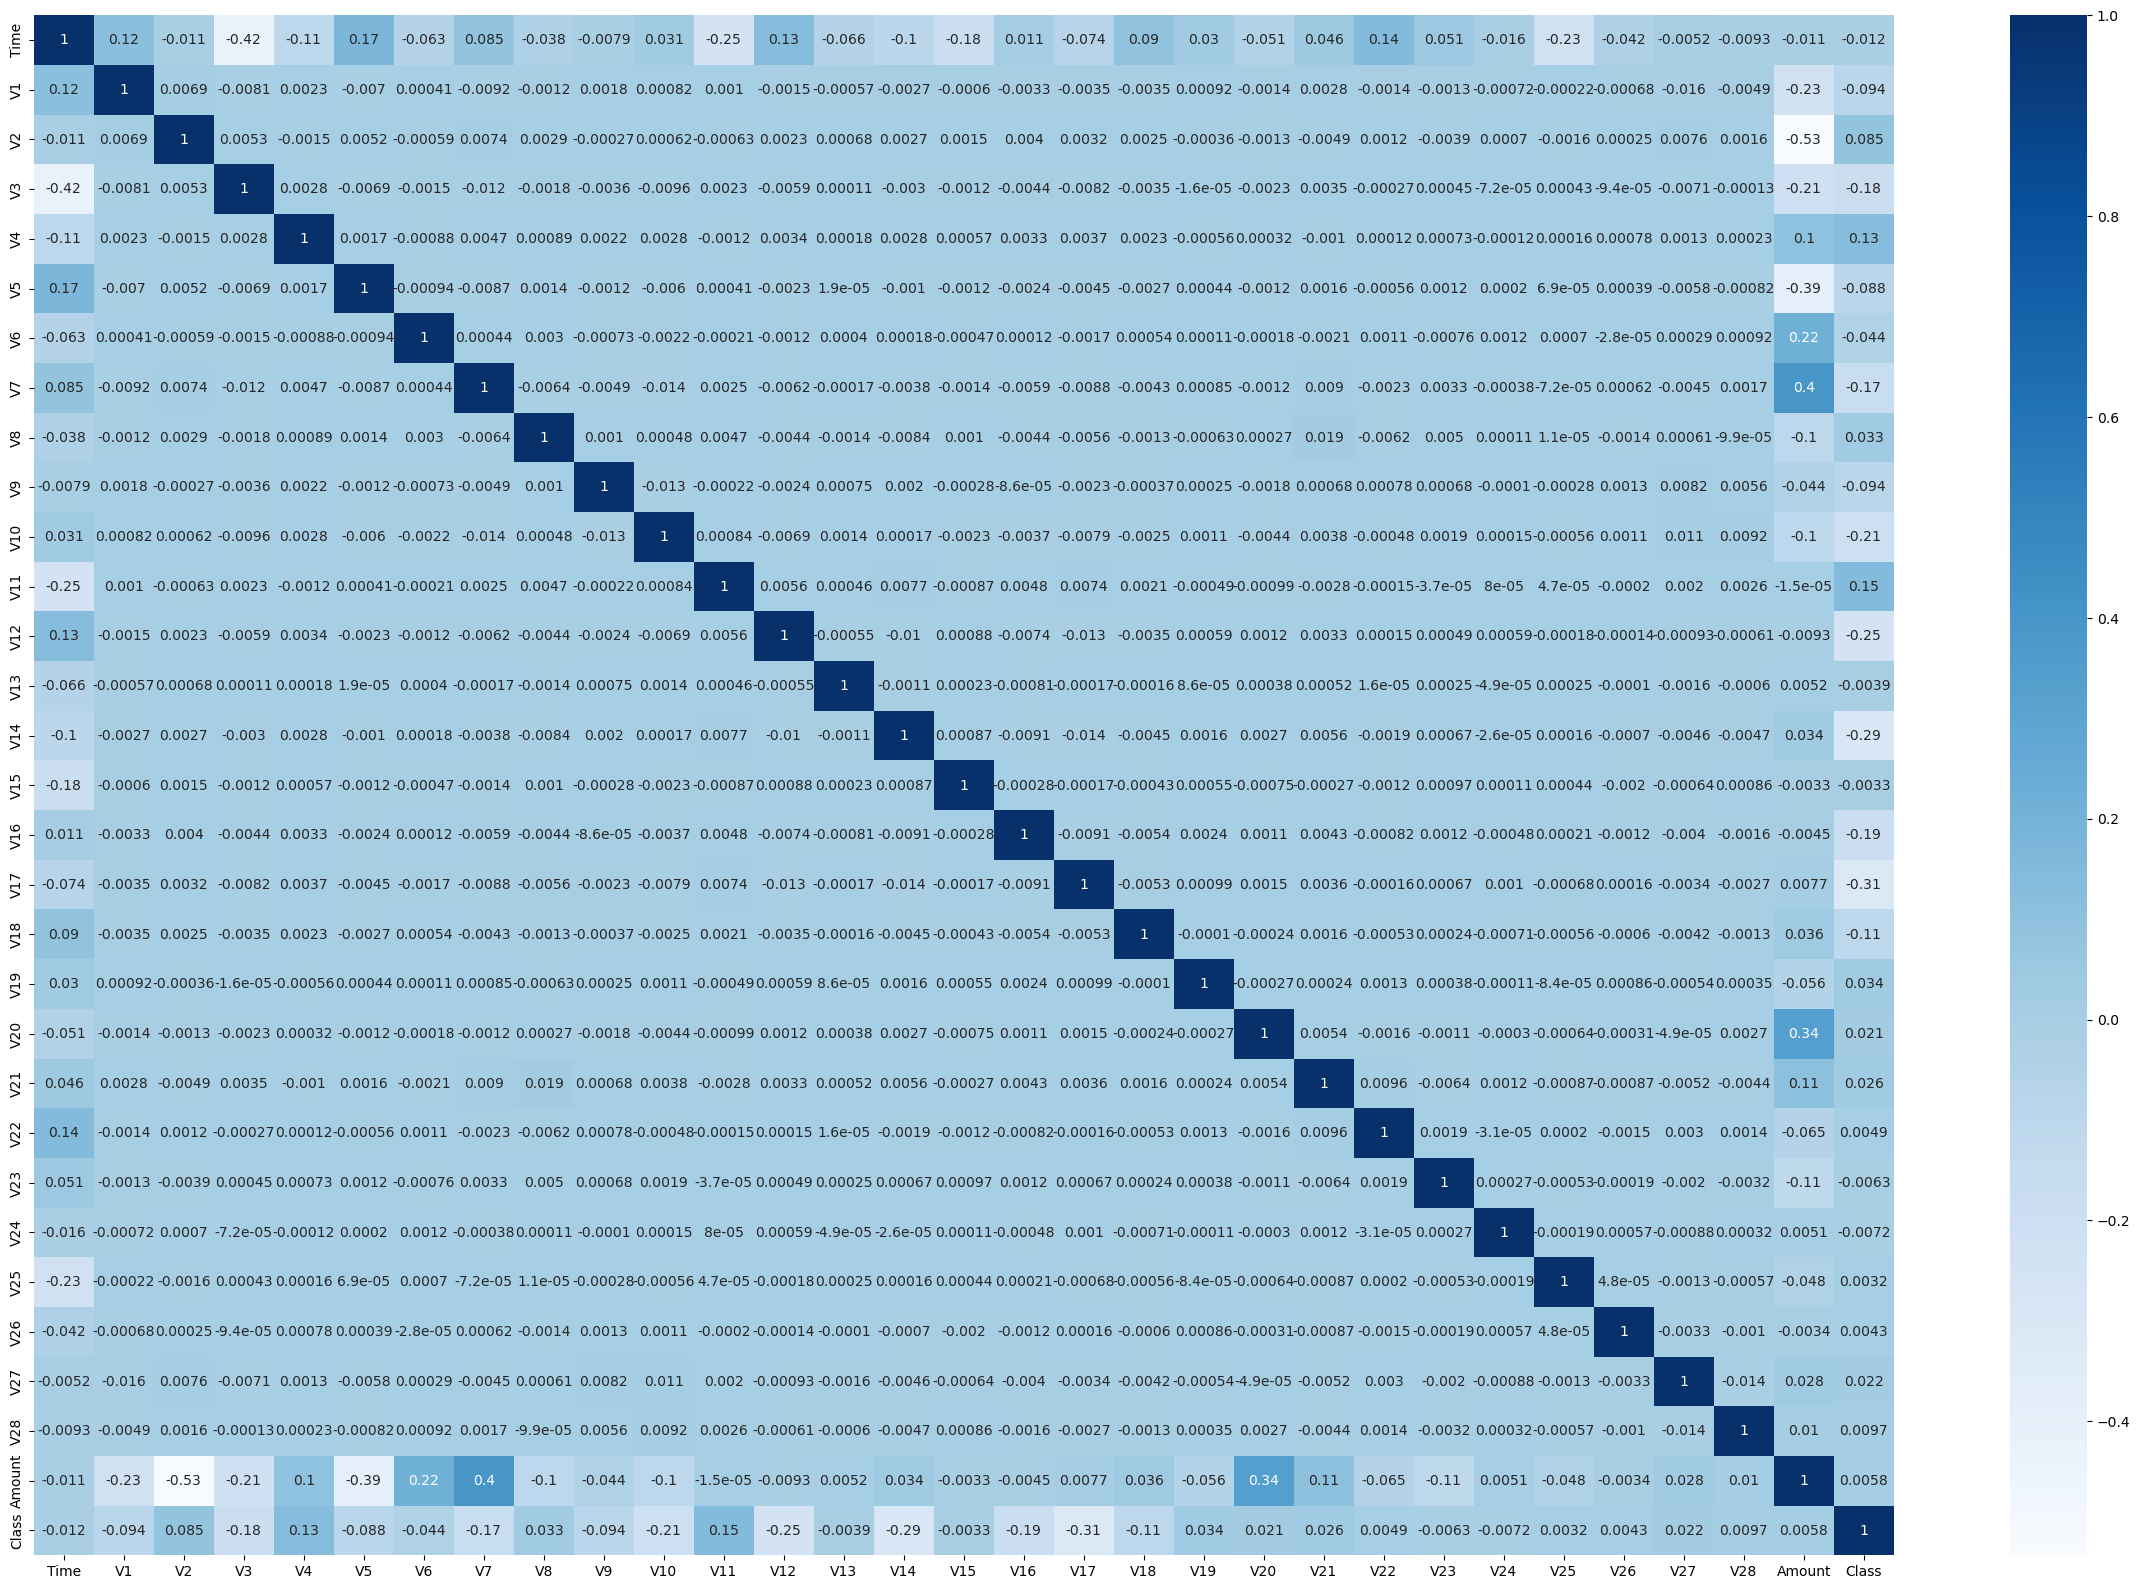

In [7]:
plt.figure (figsize = (30, 20))
correlation = data.corr ()
sns.heatmap (correlation, annot = True, cmap = 'Blues')

As we can see in the above heatmap, there is no correlation between the variables.

* ***<font color="purple">Normalization : Distribution & Outliers</font>***
* <font color="purple">Distribution of the target variable</font>

In [8]:
data ['Class'].value_counts ()


0    283253
1       473
Name: Class, dtype: int64

- <font color="purple">Normal ditribution before handling outliers</font>

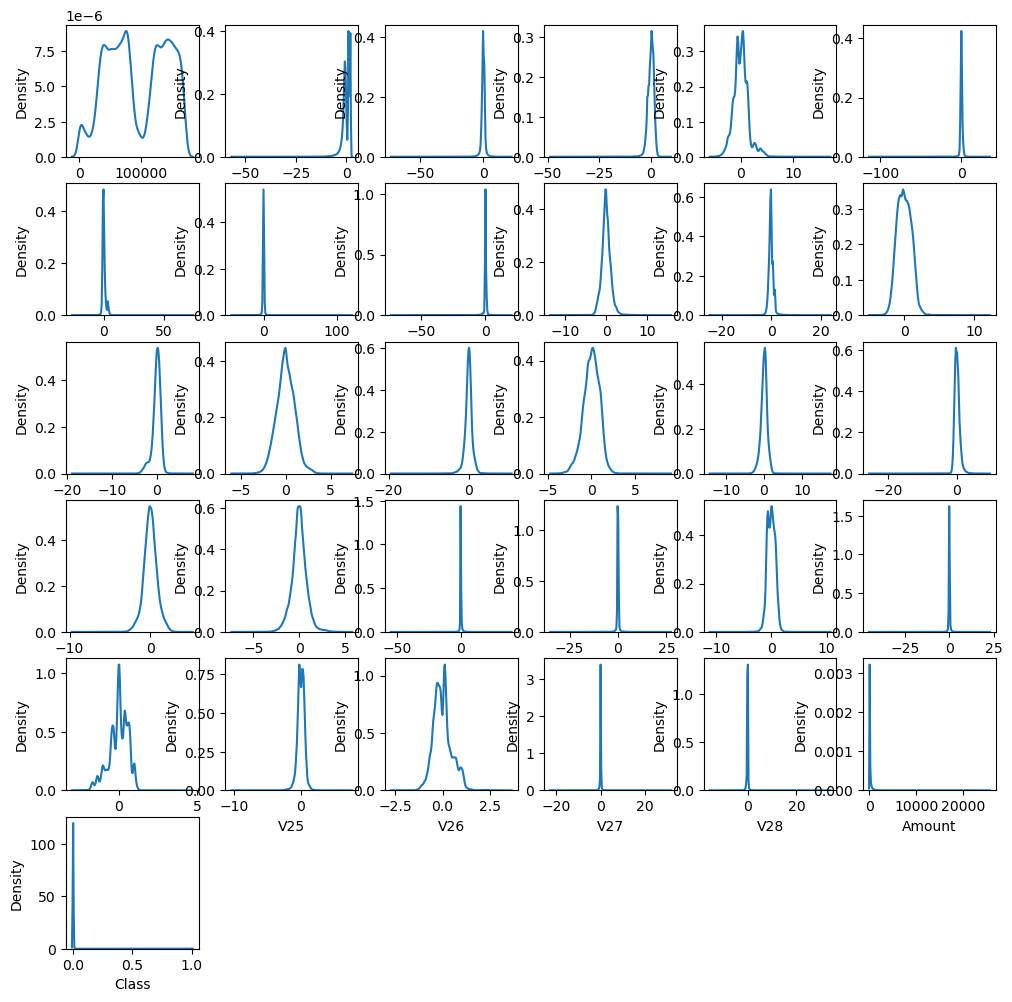

In [9]:
plt.figure (figsize = (12, 12))
i = 1
for col in data.columns :
    plt.subplot (6, 6, i)
    sns.kdeplot (data[col])
    i += 1

- <font color="purple">Boxplots before handling outliers</font>

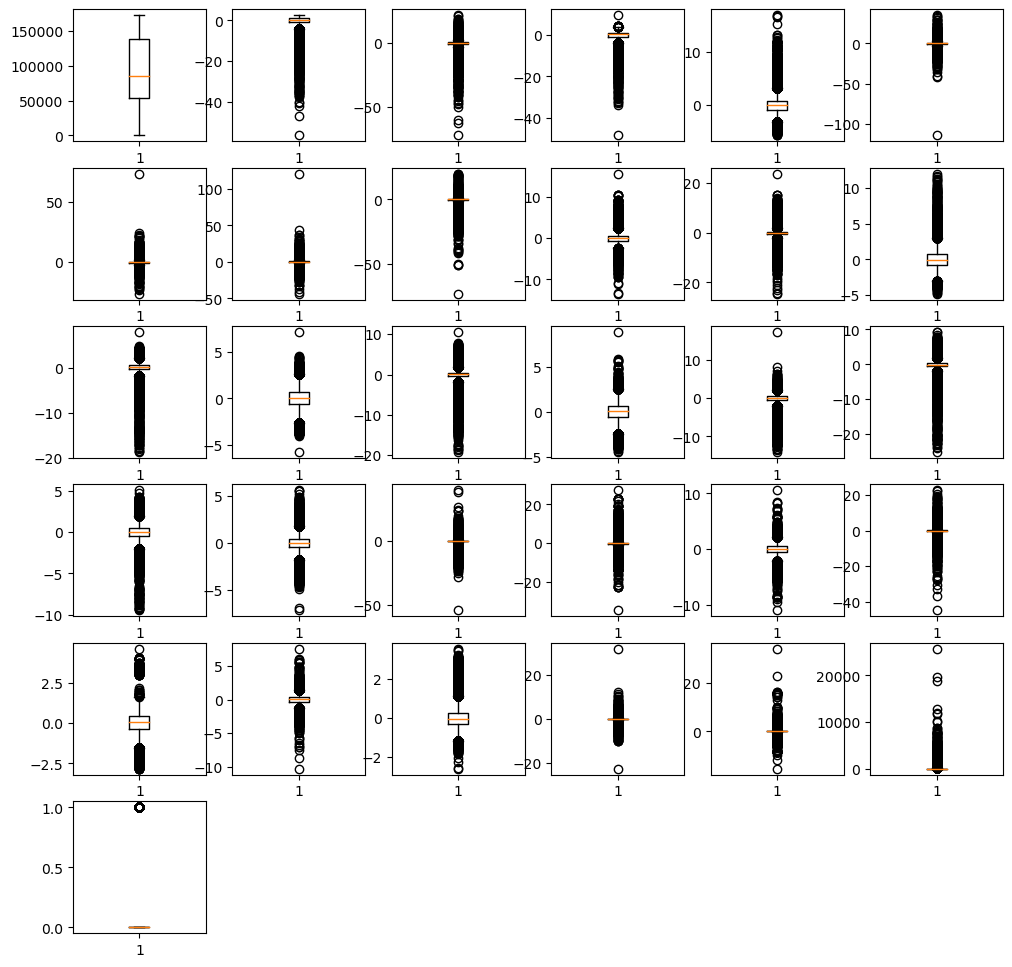

In [10]:
plt.figure (figsize = (12, 12))
i = 1
for col in data.columns :
    plt.subplot (6, 6, i)
    plt.boxplot (data [[col]], vert = True)
    i += 1

In [11]:
data.shape

(283726, 31)

In [12]:
Q1 = data.quantile (0.25)
Q3 = data.quantile (0.75)
IQR = Q3 - Q1
IQR

Time      85093.250000
V1            2.232019
V2            1.400603
V3            1.916642
V4            1.589781
V5            1.302048
V6            1.165823
V7            1.122983
V8            0.534532
V9            1.240198
V10           0.989197
V11           1.501228
V12           1.023174
V13           1.311040
V14           0.918068
V15           1.231556
V16           0.990371
V17           0.882899
V18           0.999970
V19           0.914797
V20           0.344676
V21           0.414499
V22           1.070945
V23           0.309452
V24           0.794192
V25           0.668153
V26           0.567025
V27           0.161849
V28           0.131094
Amount       71.910000
Class         0.000000
dtype: float64

In [13]:
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any (axis=1)
outliers.value_counts ()

False    145938
True     137788
dtype: int64

In [14]:
print ("Potential Outliers:")
data [outliers]

Potential Outliers:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
11,10.0,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
14,12.0,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [15]:
def detect_outliers_iqr (data) :
    """Function that detects outliers in a given dataset"""
    for col in data.iloc [:,:-1]:
        Q3 = data [col].quantile (0.75)
        Q1 = data [col].quantile (0.25)
        IQR = Q3-Q1
        up_limit = Q3 + 1.5 * IQR
        lw_limit = Q1 - 1.5 * IQR

        data [col] = np.where (data [col] > up_limit, up_limit,
            np.where (data[col] < lw_limit , lw_limit , data [col]))

In [16]:
detect_outliers_iqr (data)
data.head ()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.611926,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,185.375,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990,0


In [17]:
data.shape

(283726, 31)

- <font color="purple">Normal Distribution after handling outliers</font>

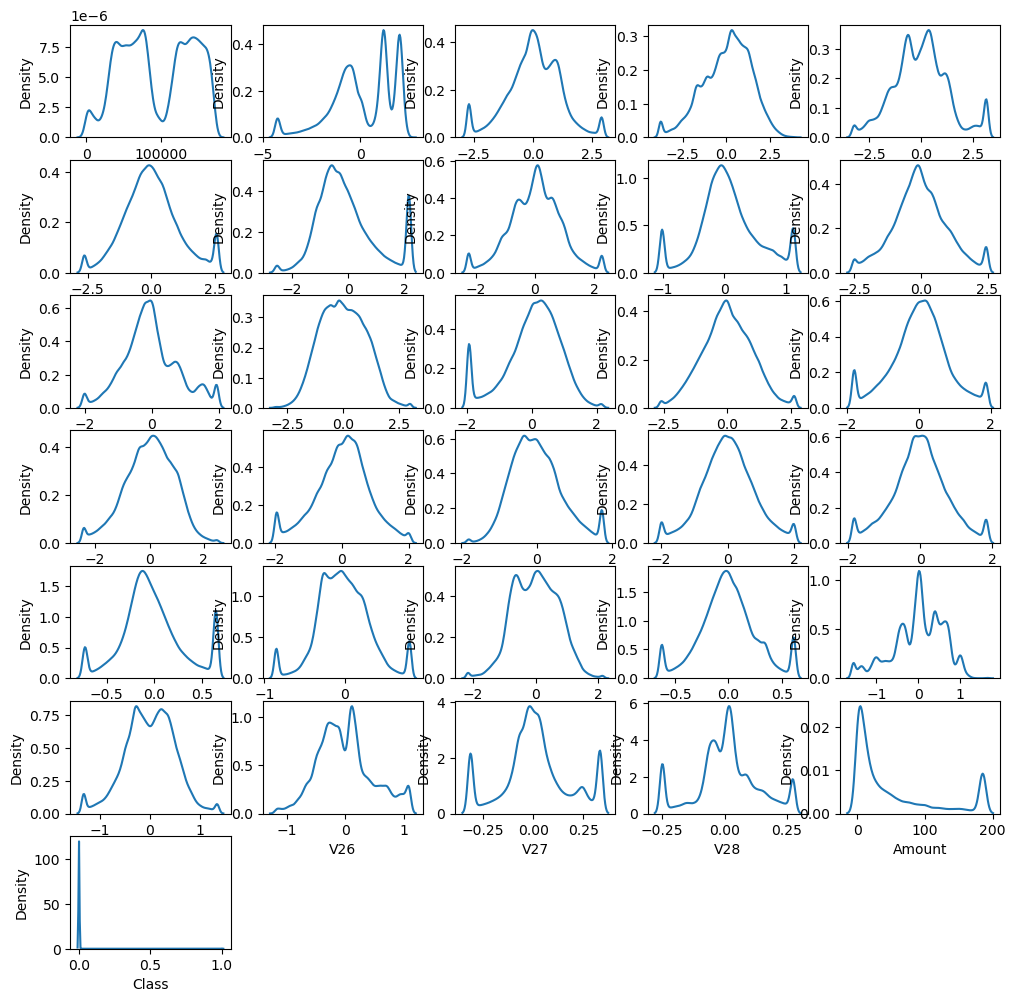

In [18]:
plt.figure (figsize = (12, 12))
i = 1
for col in data.columns :
    plt.subplot (7, 5, i)
    sns.kdeplot (data[col])
    i += 1

- <font color="purple">Boxplots after handling outliers</font>

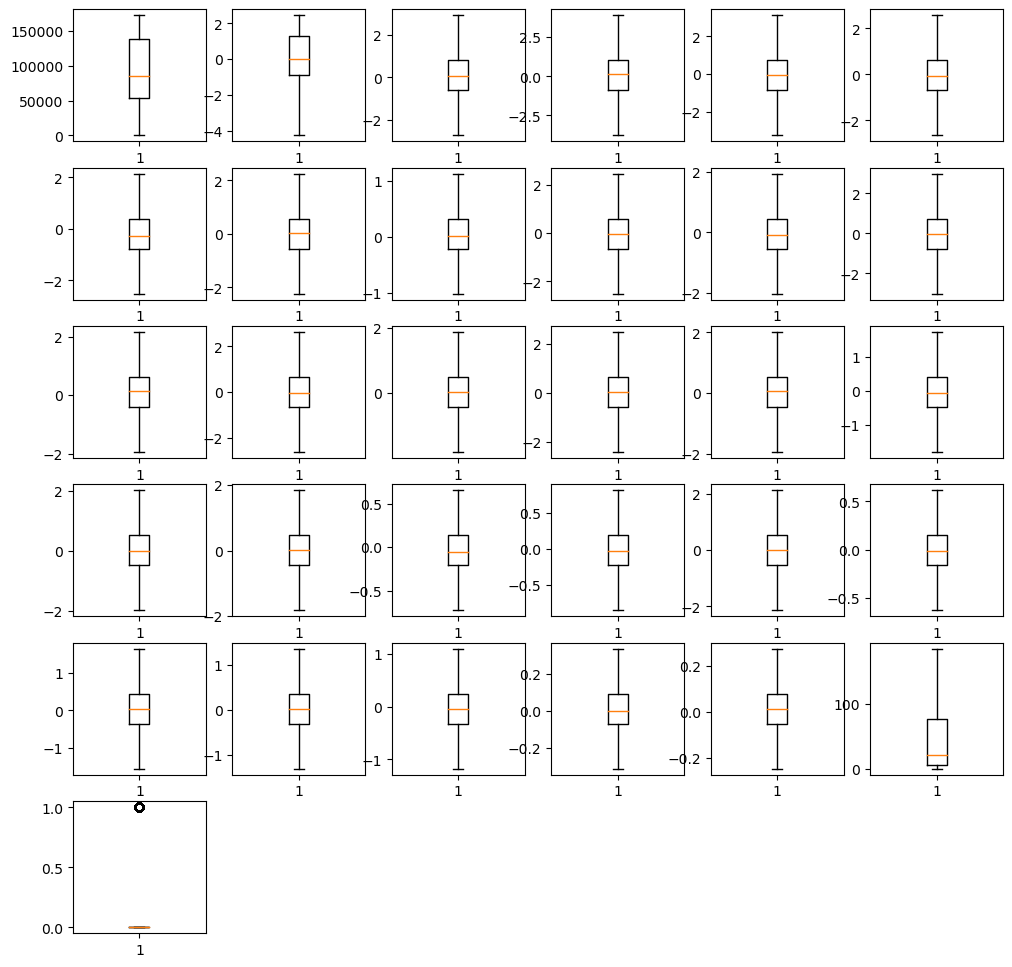

In [19]:
plt.figure (figsize = (12, 12))
i = 1
for col in data.columns :
    plt.subplot (6, 6, i)
    plt.boxplot (data [[col]], vert = True)
    i += 1

## <center><font color="purple">3. Data Splitting</font></center>

For training and testing we splite the dataset into two subsets. But first we need to identify the features and target (variable to predict).

#### <center><font color="purple">3.1. Features & Target</font></center>
Here, the variable to predict is 'Class' so it is the target and the remaing variables are the features. Let `X` be the features and `y` the target.

In [20]:
# Features
X = data.drop ('Class', axis = 1)
print (f"Shape features : {X.shape}")
X.head ()

Shape features : (283726, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.611926,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,185.375
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990


In [21]:
# Target
y = data ['Class']
print (f"The target's hape is : {y.shape}")
y.head ()

The target's hape is : (283726,)


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

#### <center><font color="purple">3.2. Training & Testing Sets</font></center>
In order to split the features and the target into training and testing sets, we will use `train_test_split ()` function provided by the module `model_selection` of the library `sklearn` also known as `scikit-leanr`. We choose to set the testing subset size to 20 % of the dataset.

In [22]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)
print (f"Training features' shape : {X_train.shape} | Testing features' shape : {X_test.shape}")
print (f"Training target's shape : {y_train.shape} \t| Testing target's shape : {y_test.shape}")

Training features' shape : (226980, 30) | Testing features' shape : (56746, 30)
Training target's shape : (226980,) 	| Testing target's shape : (56746,)


### <center><font color="purple">4. Classification Algorithms</font></center>

For this project, we chose to build a *Logistic Regression* model and a *Random Forest* model. Therefore, we will create an instance of the `LogisticRegression ()` model and the `RandomForestClassifier ()` model, respectively.

#### <center><font color="purple">4.1. Logistic Regression</font></center>
* <font color="purple">Model</font>

In [23]:
# Model : LogisticRegression
log_reg_model = LogisticRegression (random_state = 42)

# Training the model
log_reg_model.fit (X_train, y_train)

LogisticRegression(random_state=42)

* <font color="purple">Prediction</font>

In [24]:
log_reg_pred = log_reg_model.predict (X_test)
log_reg_pred

array([0, 0, 0, ..., 0, 0, 0])

* <font color="purple">Confusion Matrix</font>

In [25]:
def plot_confusion_matrix (y_test, y_pred, model) :
    cf_matrix = confusion_matrix (y_test, y_pred)
    plt.figure (figsize = (5, 3))
    plt.title (f"{model}'s Confusion Matrix")
    sns.heatmap (cf_matrix, annot = True, cmap = 'Blues', fmt = 'd')
    plt.xlabel ('Predicted Values')
    plt.ylabel ('Actual Values')
    plt.show

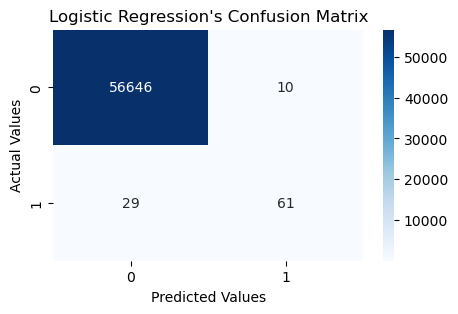

In [26]:
plot_confusion_matrix (y_test, log_reg_pred, "Logistic Regression")

* <font color="purple">Accuracy</font>

In [27]:
log_reg_accuracy = accuracy_score(y_test, log_reg_pred) * 100
print (f"The Logistic Regression model's accuracy is : {round (log_reg_accuracy, 2)} %\n")
# Evaluating the Logistic Regression  model
mse = mean_squared_error(y_test, log_reg_pred)
print(f"Logistic Regression's Mean Squared Error: {mse}.\n")
print (f"\t\t\tClassification report :\n {classification_report (y_test, log_reg_pred)}")

The Logistic Regression model's accuracy is : 99.93 %

Logistic Regression's Mean Squared Error: 0.0006872731117611814.

			Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.86      0.68      0.76        90

    accuracy                           1.00     56746
   macro avg       0.93      0.84      0.88     56746
weighted avg       1.00      1.00      1.00     56746



#### <center><font color="purple">4.2. Random Forest</font></center>
* <font color="purple">Model</font>

In [28]:
# Model : RandomForest
rf_model = RandomForestClassifier (n_estimators = 100)

# Train
rf_model.fit (X_train, y_train)

RandomForestClassifier()

* <font color="purple">Prediction</font>

In [29]:
rf_pred = rf_model.predict (X_test)
rf_pred

array([0, 0, 0, ..., 0, 0, 0])

* <font color="purple">Confusion Matrix</font>

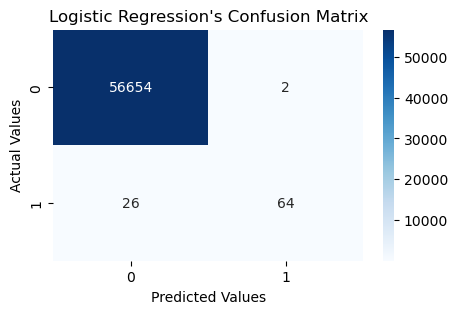

In [30]:
plot_confusion_matrix (y_test, rf_pred, "Logistic Regression")

* <font color="purple">Accuracy</font>

In [31]:
log_reg_accuracy = accuracy_score(y_test, rf_pred) * 100
print (f"The Logistic Regression model's accuracy is : {round (log_reg_accuracy, 2)} %.\n")
# Evaluating the Random Forest Classifier  model
mse = mean_squared_error(y_test, rf_pred)
print(f"Logistic Regression's Mean Squared Error: {mse}.\n")
print (f"\t\t\tClassification report :\n {classification_report (y_test, rf_pred)}")

The Logistic Regression model's accuracy is : 99.95 %.

Logistic Regression's Mean Squared Error: 0.0004934268494695661.

			Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.71      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

